# <center> Exploring the data </center>

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import cv2
import random
from my_class.yolov8dataset import Yolov8Dataset,index_to_class_name, class_name_to_index

Create the dataset and explore the data

In [2]:
# Create a Yolov8Dataset object
dataset = Yolov8Dataset('Rock_Paper_Scissors_Data')
print(dataset)

Class attributes: ['Paper', 'Rock', 'Scissors']


Dataset : Rock_Paper_Scissors_Data 
 Number of samples: 825

Subdirectory: Rock_Paper_Scissors_Data\test
Number of samples: 78 
Class Counts:
- Paper: 20 samples
- Rock: 21 samples
- Scissors: 23 samples
- without labels: 16 samples
Class Attributes: ['Paper', 'Rock', 'Scissors']

Subdirectory: Rock_Paper_Scissors_Data\train
Number of samples: 593 
Class Counts:
- Paper: 160 samples
- Rock: 154 samples
- Scissors: 116 samples
- without labels: 178 samples
Class Attributes: ['Paper', 'Rock', 'Scissors']

Subdirectory: Rock_Paper_Scissors_Data\valid
Number of samples: 154 
Class Counts:
- Paper: 38 samples
- Rock: 36 samples
- Scissors: 31 samples
- without labels: 49 samples
Class Attributes: ['Paper', 'Rock', 'Scissors']




In [ ]:
# Get the number of classes
classes = dataset.class_attributes
print("Class names: ", classes)

Class names:  ['Paper', 'Rock', 'Scissors']


## Data visualization 

We will display 3 images for each class.

------------------------------------------------------------------------------------------------------------------------
                                                 Class name:  PAPER
------------------------------------------------------------------------------------------------------------------------


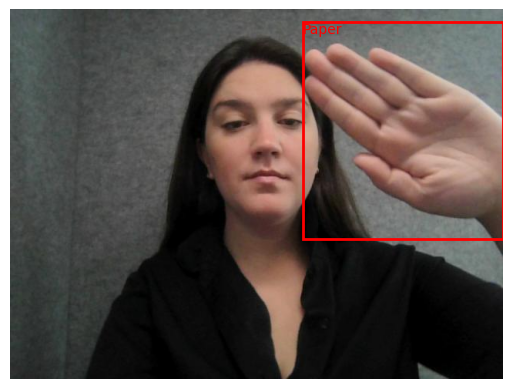

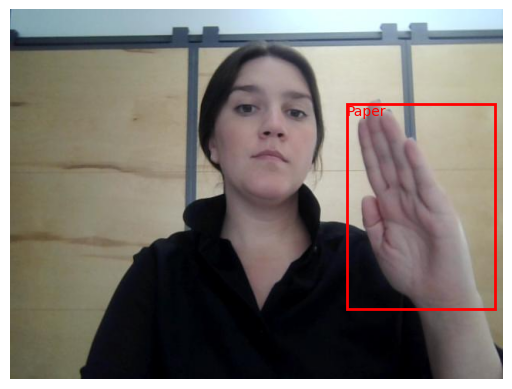

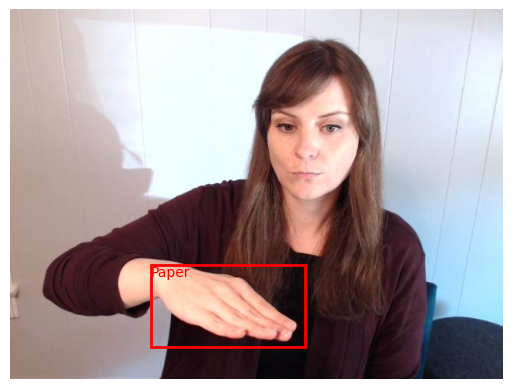

------------------------------------------------------------------------------------------------------------------------
                                                 Class name:  ROCK
------------------------------------------------------------------------------------------------------------------------


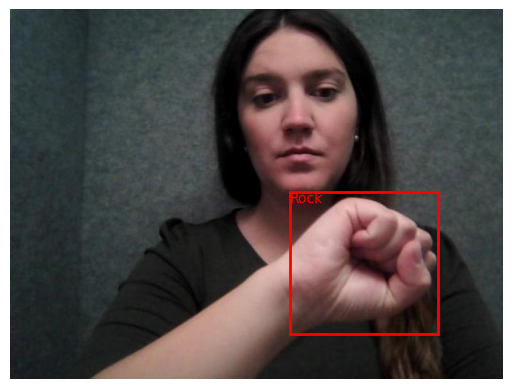

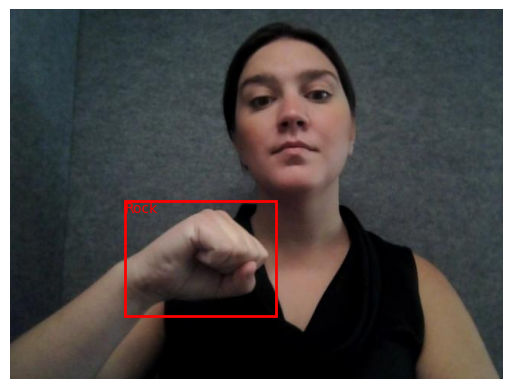

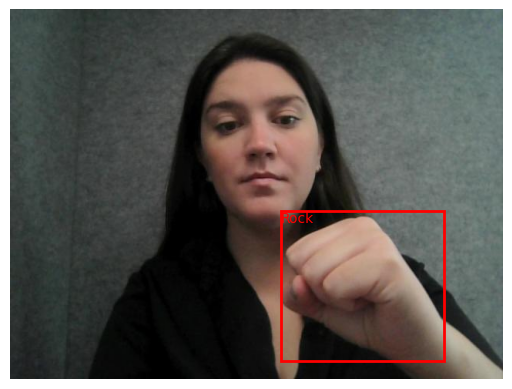

------------------------------------------------------------------------------------------------------------------------
                                                 Class name:  SCISSORS
------------------------------------------------------------------------------------------------------------------------


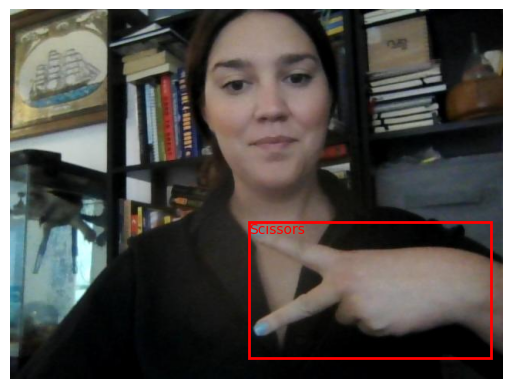

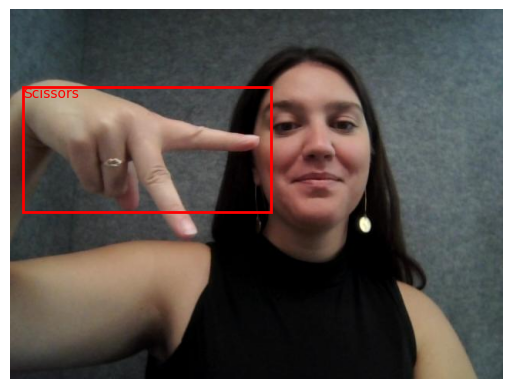

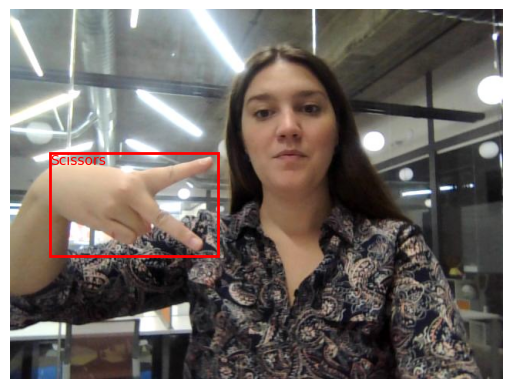

In [ ]:
for classe in classes:
    print("------"*20)
    print("      "*8,"Class name: ", classe.upper())
    print("------"*20)
    for i in range(3):
        image = dataset['train'].get_random_sample_by_class_id(class_name_to_index(classe,classes))
        image.display_image()

## Data analysis

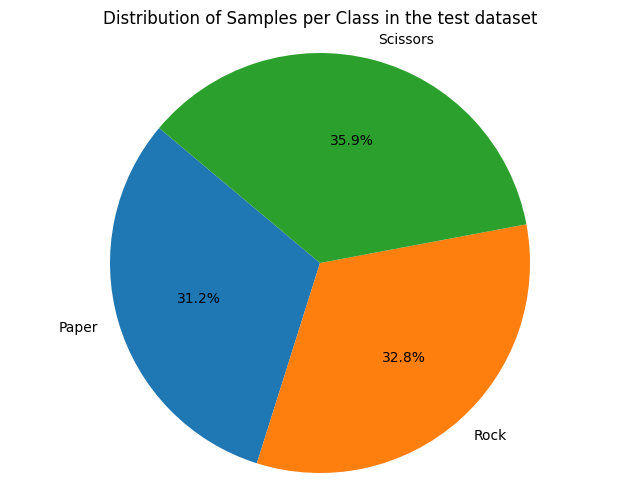

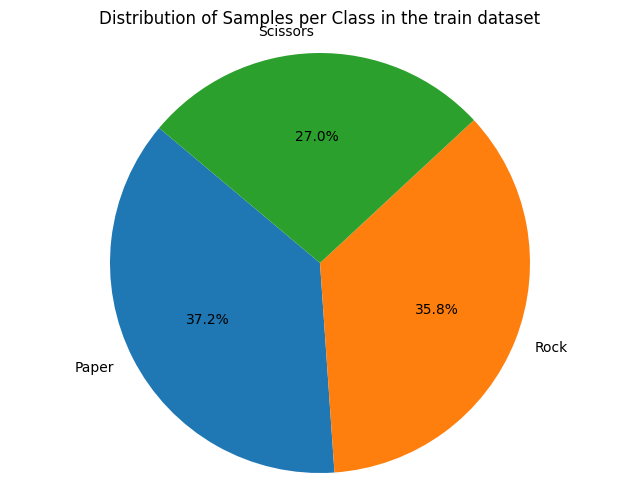

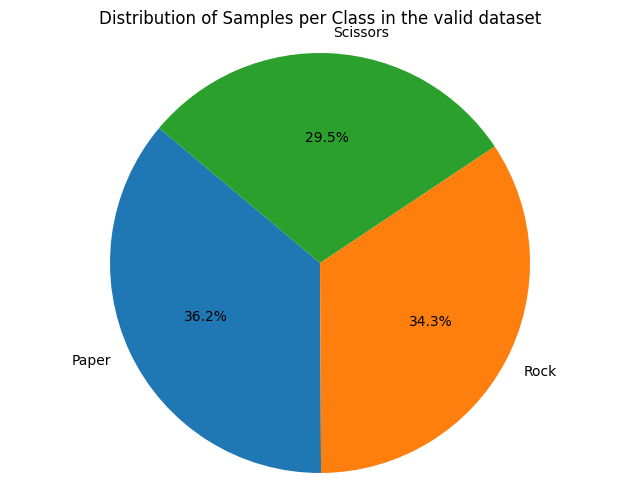

In [ ]:
for subset in dataset.sub_dirs:

    class_counts = dataset[subset].class_counts

    # Extract class IDs and sample counts
    class_ids = list(index_to_class_name(key,classes) for key,value in class_counts.items())
    sample_counts = list(class_counts.values())

    # Create pie plot
    plt.figure(figsize=(8, 6))
    plt.pie(sample_counts, labels=class_ids, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Samples per Class in the {subset} dataset')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Explore the images without labels and try to find some patterns.

In [ ]:
print(f"There is {dataset['train'].nb_images_without_labels} images without labels in the training dataset")

There is 178 images without labels in the training dataset


Let vizualise how the images look like without labels

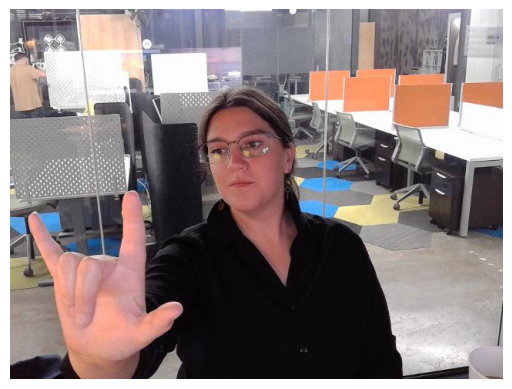

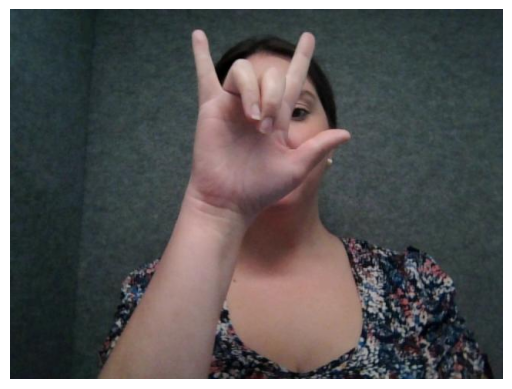

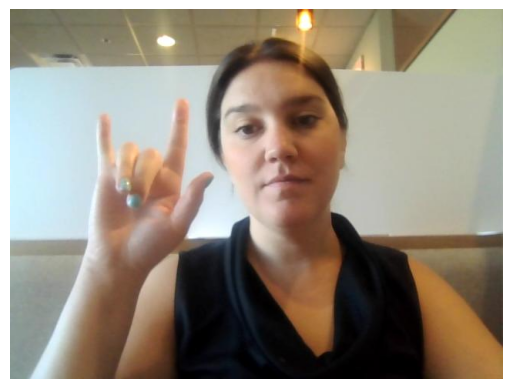

In [ ]:
for i in range(3):
    dataset['train'].get_random_image_without_label().display_image()